# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 

#### Question 2. Create a summary table

In [4]:
df_raw.describe() 

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: because the range of values GRE can be is much greater than the range of values for gpa. The range of values for GRE is 220 to 800 where as the values for GPA only run from 2.2 to 4.0 in these data.

#### Question 4. Drop data points with missing data


In [5]:
df_no_na = df_raw.dropna()

In [22]:
df_no_na.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: When I run the summary statistics now it calculates for  all variables instead of returning NaN as it did before. 

#### Question 6. Create box plots for GRE and GPA

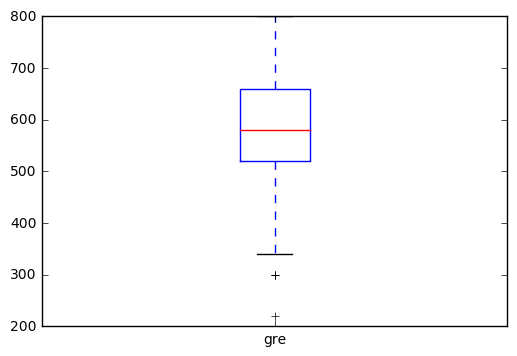

In [13]:
#boxplot 1  

df_raw[['gre']].plot(kind='box');

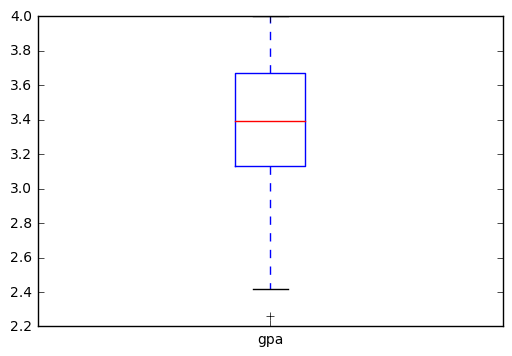

In [29]:
#boxplot 2 : GPA

df_raw[['gpa']].plot(kind='box');

#### Question 7. What do this plots show?

Answer: This plot shows the median of the variables, gre and gpa, respectively.  Also, it shows the interquartile range and outlier values for both variables.

#### Question 8. Describe each distribution 

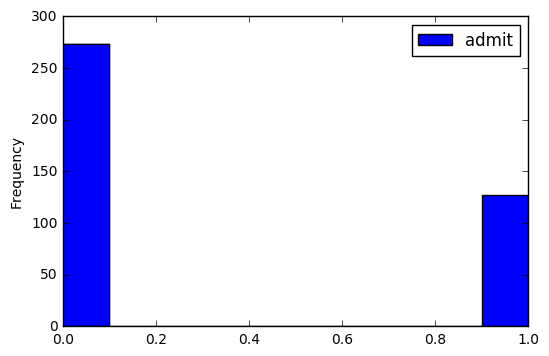

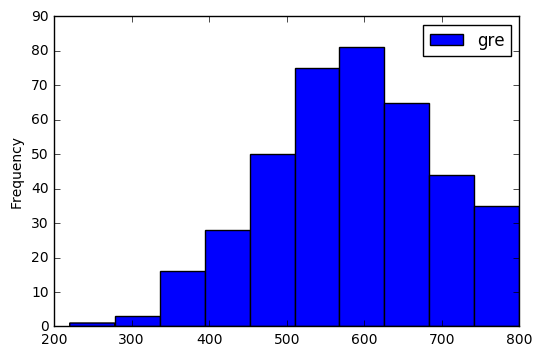

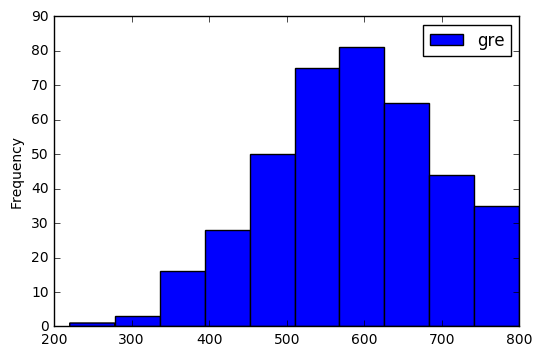

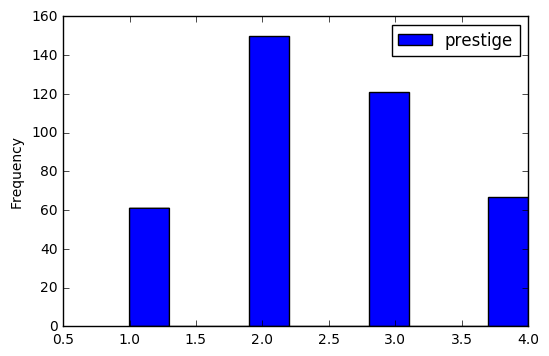

In [26]:
# plot the distribution of each variable 

df_raw[['admit']].plot(kind='hist');
df_raw[['gre']].plot(kind='hist');
df_raw[['gre']].plot(kind='hist');
df_raw[['prestige']].plot(kind='hist');

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer:  No, it would not. None of these variables have a symmetrical distribution. Admit is binary, both GPA and GRE are negatively skewed. And prestige almost looks like a uniform distribution that is positively skewed.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, ourmodel cannot assume normal distribution based on the results above.  As such, it would need correction.  Since admit is a binary variable we would need to use a model that allows for binomial distribution. For the other variables, I suggest using the median while modeling to allow for the skewness.  

#### Question 11. Which of our variables are potentially colinear? 

In [30]:
# create a correlation matrix for the data

df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: It looks like GPA and GRE have the greatest correlation from all the combinations above; it is a positive linear relationship.  Admit and prestige have the second greatest correlation although it is a negative linear relationship.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:  I would begin by running some of the items we did above, including the summary statistics, box plots and histograms, and correlation matrix.  From there I know that I have some missing data in the prestige variable.  I would determine how to handle the missing value, perhaps drop the record completely since its only one record in this instance. I would then run a regression and test if my coefficient of prestige is significant.


#### Question 14. What is your hypothesis? 

Answer:  My hypothesis is that there is no significant linear relationship between prestige of an undergrad school and being admitted into grad school, all else constant.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data